<img src="https://media.giphy.com/media/3o7bufB2gMeaRFfumY/giphy.gif" width="240" height="360" />

# Machine Learning Foundation Project

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
    - 2.1 [Importing Packages](#section201)<br>
    - 2.2 [Importing the Dataset](#section202)<br>
    - 2.3 [Attributes of Data](#section203)<br>
3. [Pandas Profiling before Data Processing](#section3)
4. [Preprocessing the Data](#section4)
5. [Pandas Profiling after Data Processing](#section4)
6. [Linear Regression](#section5)<br>
    - 6.1 [Distribution of Features](#section601)<br>
    - 6.2 [Visualising Pairwise Correlation](#section602)<br>
    - 6.3 [Preparing X and y using pandas](#section603)<br>
    - 6.4 [Splitting X and y into training and test datasets.](#section604)<br>
    - 6.5 [Linear regression in scikit-learn](#section605)<br>
    - 6.6 [Using the Model for Prediction](#section606)<br>
    - 6.7 [Model Evaluation](#section607)<br>
7. [Random Forest Classifier](#section7)<br>
    - 7.1 [Using the Model for Prediction](#section701)<br>
    - 7.2 [Model evaluation](#section702)<br> 
8. [Conclusion](#section8)<br>

<a id=section1></a>

## 1. Problem Statement

The goal is to predict __price__ of avocadoes.

<a id=section2></a>

## 2. Data Loading and Description

<a id=section201></a>

### 2.1 Importing packages                                          

In [1]:
#import sys
#!{sys.executable} -m pip install pandas_profiling

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis

import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline


from subprocess import check_output

<a id=section202></a>

### 2.2 Importing the Dataset

In [3]:
avocado_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")     # Importing training dataset using pd.read_csv

In [3]:
avocado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avocado_data.shape

(18249, 14)

- The dataset comprises of __18249 observations of 14 columns__. Below is a table showing names of all the columns and their description.

| Column Name      | Description                                                              |
| -------------    |:-------------                                                           :| 
| Unnamed: 0       | Index column                                                             | 
| Date             | The date of the observation                                              |  
| AveragePrice     | The average price of a single avocado                                    | 
| Type             | Conventional or organic                                                  |   
| Year             | The year                                                                 |
| Region           | The city or region of the observation                                    |
| Total Volume     | Total number of avocados sold                                            |
| 4046             | Total number of avocados with PLU 4046 sold (4046 – Hass – small)        |
| 4225             | Total number of avocados with PLU 4225 sold (4225 – Hass – large)        |
| 4770             | Total number of avocados with PLU 4770 sold (4770 – Hass Extra Large)    |                                 | Total Bags       | Total number of bags of all sizes                                        |
| Small Bags       | Size of bag                                                              |
| Large Bags       | Size of bag                                                              |
| XLarge Bags      | Size of bag                                                              |

<a id=section203></a>

### 2.3 Attributes of Data

In [4]:
avocado_data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- Data has no missing values.

In [6]:
avocado_data.describe(include ='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,2017-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,GreatLakes
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,24.232232,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,10.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,24.000000,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,38.000000,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [5]:
avocado_data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

<a id=section3></a>

## 3. Pandas Profiling before Data Processing

In [6]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in e:\anaconda\lib\site-packages (2.4.0)


In [7]:
import pandas_profiling 

In [12]:
from pandas_profiling import ProfileReport

In [10]:
avocado_data.profile_report(title='Pandas Profiling before Data Preprocessing')

In [15]:
profile = avocado_data.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")


<a id=section4></a>

## 4. Preprocessing the Data

In [4]:
avocado_data2 = avocado_data.copy()

In [23]:
avocado_data2.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- No null values.

In [24]:
avocado_data2.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [25]:
avocado_data2.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


#### 'Unnamed' Column

Observation:<br>
'Unnamed' is an ID column. So, dropping it.

In [5]:
avocado_data2.drop('Unnamed: 0', axis = 1,inplace = True)

In [27]:
avocado_data2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### 'Type' Column

Checking for unique values in 'type' column.

In [28]:
avocado_data2['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [20]:
avocado_data3 = avocado_data.copy()
avocado_data3['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

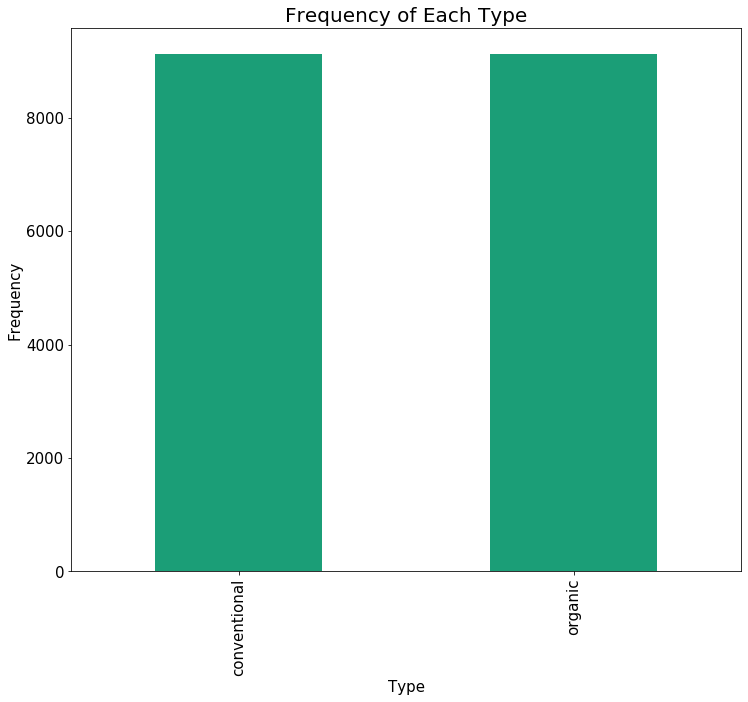

In [72]:
avocado_data3['type'].value_counts().plot.bar(figsize = (12,10), colormap = 'Dark2')
plt.xlabel('Type', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency of Each Type', fontsize = 20)
plt.savefig('Frequency of Each Type.png')

To find distribution of average price over the two types.

In [63]:
category_price = avocado_data3.groupby(['type'])[['AveragePrice']].mean()
category_price['Type'] = category_price.index
category_price

,AveragePrice,Type
type,,
conventional,1.158040,conventional
organic,1.653999,organic


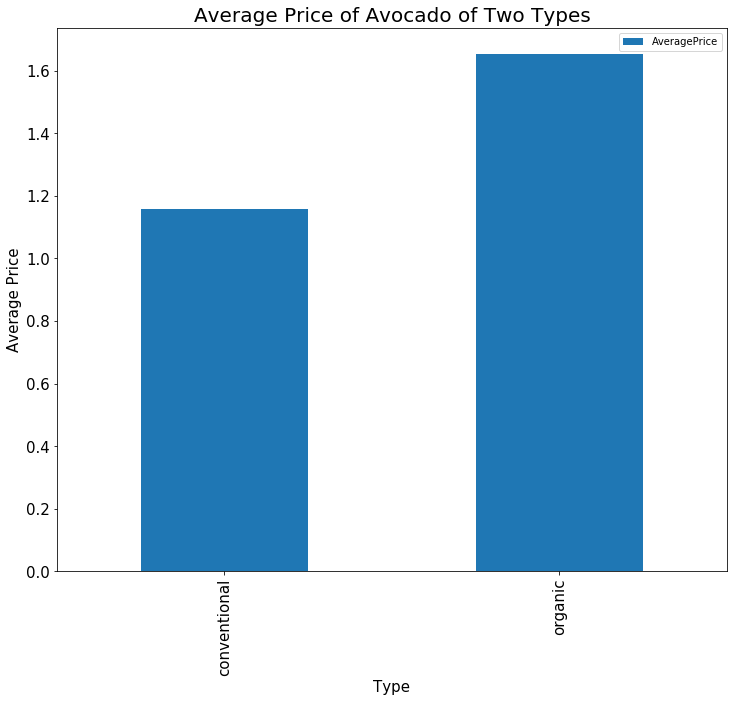

In [68]:
category_price.plot(kind = 'bar', x = 'Type', y = 'AveragePrice', figsize = (12,10))
plt.xlabel('Type', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Average Price', fontsize = 15)
plt.title('Average Price of Avocado of Two Types', fontsize = 20)
plt.savefig('Average Price of Avocado of Two Types.png')

The frequency is almost equal. So, __dummifying__ the 'type' column.

In [6]:
avocado_data2 = pd.get_dummies(avocado_data2, columns=['type'])

In [36]:
avocado_data2.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_conventional,type_organic
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,0,1
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,0,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,0,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,0,1
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,WestTexNewMexico,0,1


#### 'Region' Column

Checking for values in 'region' column.

In [33]:
avocado_data2['region'].value_counts()

GreatLakes             338
HarrisburgScranton     338
StLouis                338
GrandRapids            338
Midsouth               338
Pittsburgh             338
Albany                 338
PhoenixTucson          338
Seattle                338
DallasFtWorth          338
RaleighGreensboro      338
California             338
LosAngeles             338
Chicago                338
Indianapolis           338
Northeast              338
RichmondNorfolk        338
Boston                 338
NewOrleansMobile       338
CincinnatiDayton       338
Tampa                  338
Louisville             338
Houston                338
NorthernNewEngland     338
Denver                 338
Nashville              338
HartfordSpringfield    338
West                   338
Detroit                338
Syracuse               338
Columbus               338
Atlanta                338
Plains                 338
MiamiFtLauderdale      338
BaltimoreWashington    338
Roanoke                338
Spokane                338
T

To find distribution of average price over the the regions.

In [21]:
region_price = avocado_data2.groupby(['region'])[['AveragePrice']].mean()
region_price['Region'] = region_price.index
region_price

,AveragePrice,Region
region,,
Albany,1.561036,Albany
Atlanta,1.337959,Atlanta
BaltimoreWashington,1.534231,BaltimoreWashington
Boise,1.348136,Boise
Boston,1.530888,Boston
BuffaloRochester,1.516834,BuffaloRochester
California,1.395325,California
Charlotte,1.606036,Charlotte
Chicago,1.556775,Chicago


In [22]:
region_price.sort_values(by = 'AveragePrice', ascending = False, inplace = True)
region_price.head()

,AveragePrice,Region
region,,
HartfordSpringfield,1.818639,HartfordSpringfield
SanFrancisco,1.804201,SanFrancisco
NewYork,1.727574,NewYork
Philadelphia,1.632130,Philadelphia
Sacramento,1.621568,Sacramento


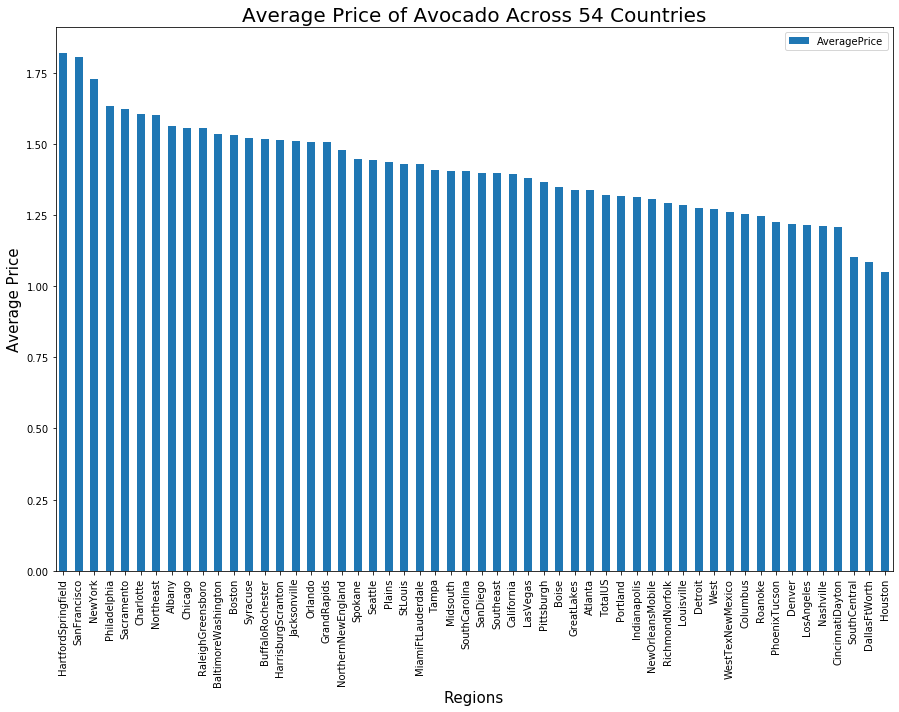

In [24]:
region_price.plot(kind = 'bar', x = 'Region', y = 'AveragePrice', figsize = (15,10))
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Average Price', fontsize = 15)
plt.title('Average Price of Avocado Across 54 Countries', fontsize = 20)
plt.savefig('Average Price of Avocado Across 54 Countries.png')

Onservation<br>
There is not much variation of avg price with region. Almost equal number of entries are obtained from each region. So, dropping 'region' column.

In [7]:
avocado_data2.drop('region', axis = 1,inplace = True)

In [9]:
avocado_data2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_conventional,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,1,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,1,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,1,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,1,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,1,0


#### 'Year' column.

Checking for unique values in 'year' column.

In [8]:
avocado_data2['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

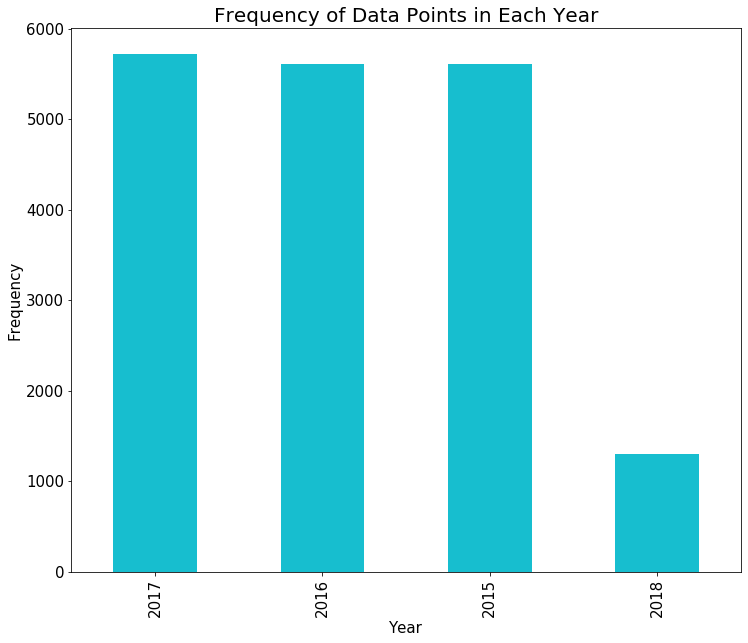

In [18]:
avocado_data2['year'].value_counts().plot.bar(figsize = (12,10), colormap = 'tab10_r')
plt.xlabel('Year', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency of Data Points in Each Year', fontsize = 20)
plt.savefig('Frequency of Data Points in Each Year.png')

To find distribution of average price over the years.

In [32]:
year_price = avocado_data2.groupby(['year'])[['AveragePrice']].mean()
year_price['Year'] = year_price.index
year_price

,AveragePrice,Year
year,,
2015,1.375590,2015
2016,1.338640,2016
2017,1.515128,2017
2018,1.347531,2018


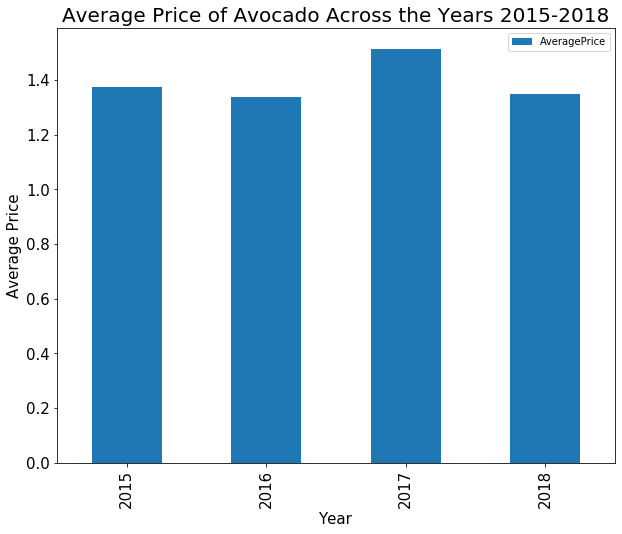

In [36]:
year_price.plot(kind = 'bar', x = 'Year', y = 'AveragePrice', figsize = (10,8))
plt.xlabel('Year', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Average Price', fontsize = 15)
plt.title('Average Price of Avocado Across the Years 2015-2018', fontsize = 20)
plt.savefig('Average Price of Avocado Across the Years 2015-2018.png')

Observation<br>
This is misleading. Year 2018 has only 1296 data points, so average is coming out to be equal.

__Dummification__ of __Year__ column.

In [38]:
avocado_data2 = pd.get_dummies(avocado_data2, columns=['year'], drop_first=True)
avocado_data2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic,year_2016,year_2017,year_2018
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,0,0,0,0


#### 'Date' Column

In [45]:
avocado_data2['Date'].nunique()

169

There are 169 unique values in 'Date' column. So, dropping it as the 'Year' column is also there.

In [46]:
avocado_data2.drop('Date', axis = 1,inplace = True)

In [48]:
avocado_data2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic,year_2016,year_2017,year_2018
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,0,0,0,0


__Observations__<br> 
- __Total volume__ is sum of the values of columns __4046__, __4225__ and __4770__.
- __Total bags__ is sum of the values of columns __Small Bags__, __Large Bags__, and __XLarge Bags__.
- 4046 – Hass – small
- 4225 – Hass – large
- 4770 – Hass Extra Large

Dropping __Total Volume__ and __Total Bags__.

In [58]:
avocado_data4 = avocado_data2.copy() #creating copy so that avocado 2 can be used later on, if required .

In [59]:
avocado_data4.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type_conventional',
       'type_organic', 'year_2016', 'year_2017', 'year_2018'],
      dtype='object')

In [60]:
avocado_data4.drop(columns =['Total Volume', 'Total Bags'], axis = 1,inplace = True)

In [61]:
avocado_data4.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic,year_2016,year_2017,year_2018
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,1,0,0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,1,0,0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,1,0,0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,1,0,0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,1,0,0,0,0


Establishing __coorelation__ between all the features using __heatmap__.

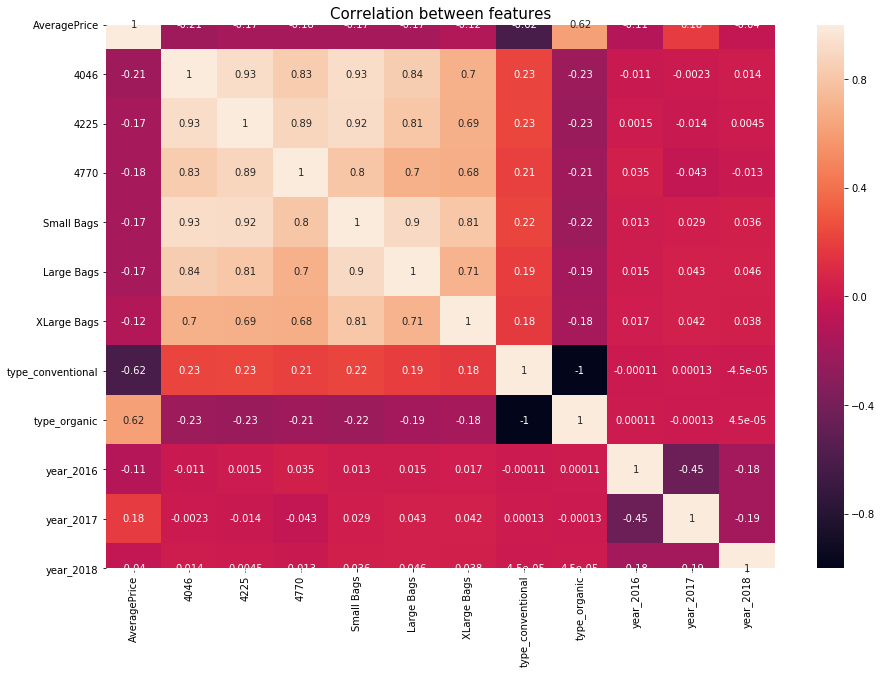

In [64]:
corr = avocado_data4.corr()   #checking correlation
plt.figure(figsize=(15,10))
sns.heatmap( avocado_data4.corr(), annot=True)
plt.title('Correlation between features', fontsize = 15)
plt.savefig('Correlation between features.png')

- There is high correlation between PLU numbers. But no column can be dropped as they are not related anyhow.
- There is high correlation between bag sizes. But no column can be dropped as they are not related anyhow.

<a id=section5></a>

## 5. Pandas Profiling after Data Processing

In [6]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in e:\anaconda\lib\site-packages (2.4.0)


In [7]:
import pandas_profiling 

In [12]:
from pandas_profiling import ProfileReport

In [10]:
avocado_data.profile_report(title='Pandas Profiling after Data Preprocessing')

In [15]:
profile = avocado_data.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="profiling_after_preprocessing.html")


<a id=section6></a>

## 6. Linear Regression

<a id=section601></a>

### 6.1 Distribution of Features

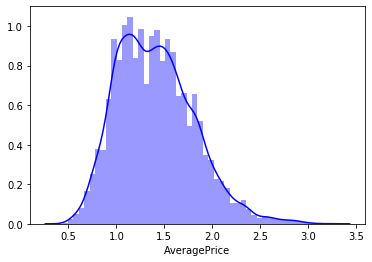

In [69]:
sns.distplot(avocado_data4['AveragePrice'], color="b")
plt.savefig('Distribution of Target Variable.png')

In [70]:
y = avocado_data4['AveragePrice']
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [71]:
#Making target variable normal
import numpy as np
y_logScale  =  np.log(y)
y_logScale.head()

0    0.285179
1    0.300105
2   -0.072571
3    0.076961
4    0.246860
Name: AveragePrice, dtype: float64

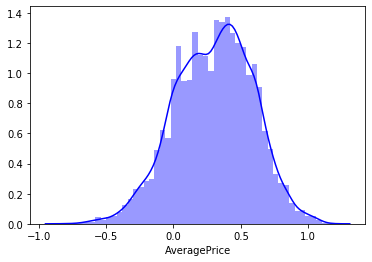

In [101]:
sns.distplot(y_logScale, color="b")
plt.savefig('Distribution of Target Variable after log transformation.png')

<a id=section602></a>

### 6.2 Visualising Pairwise Correlation

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


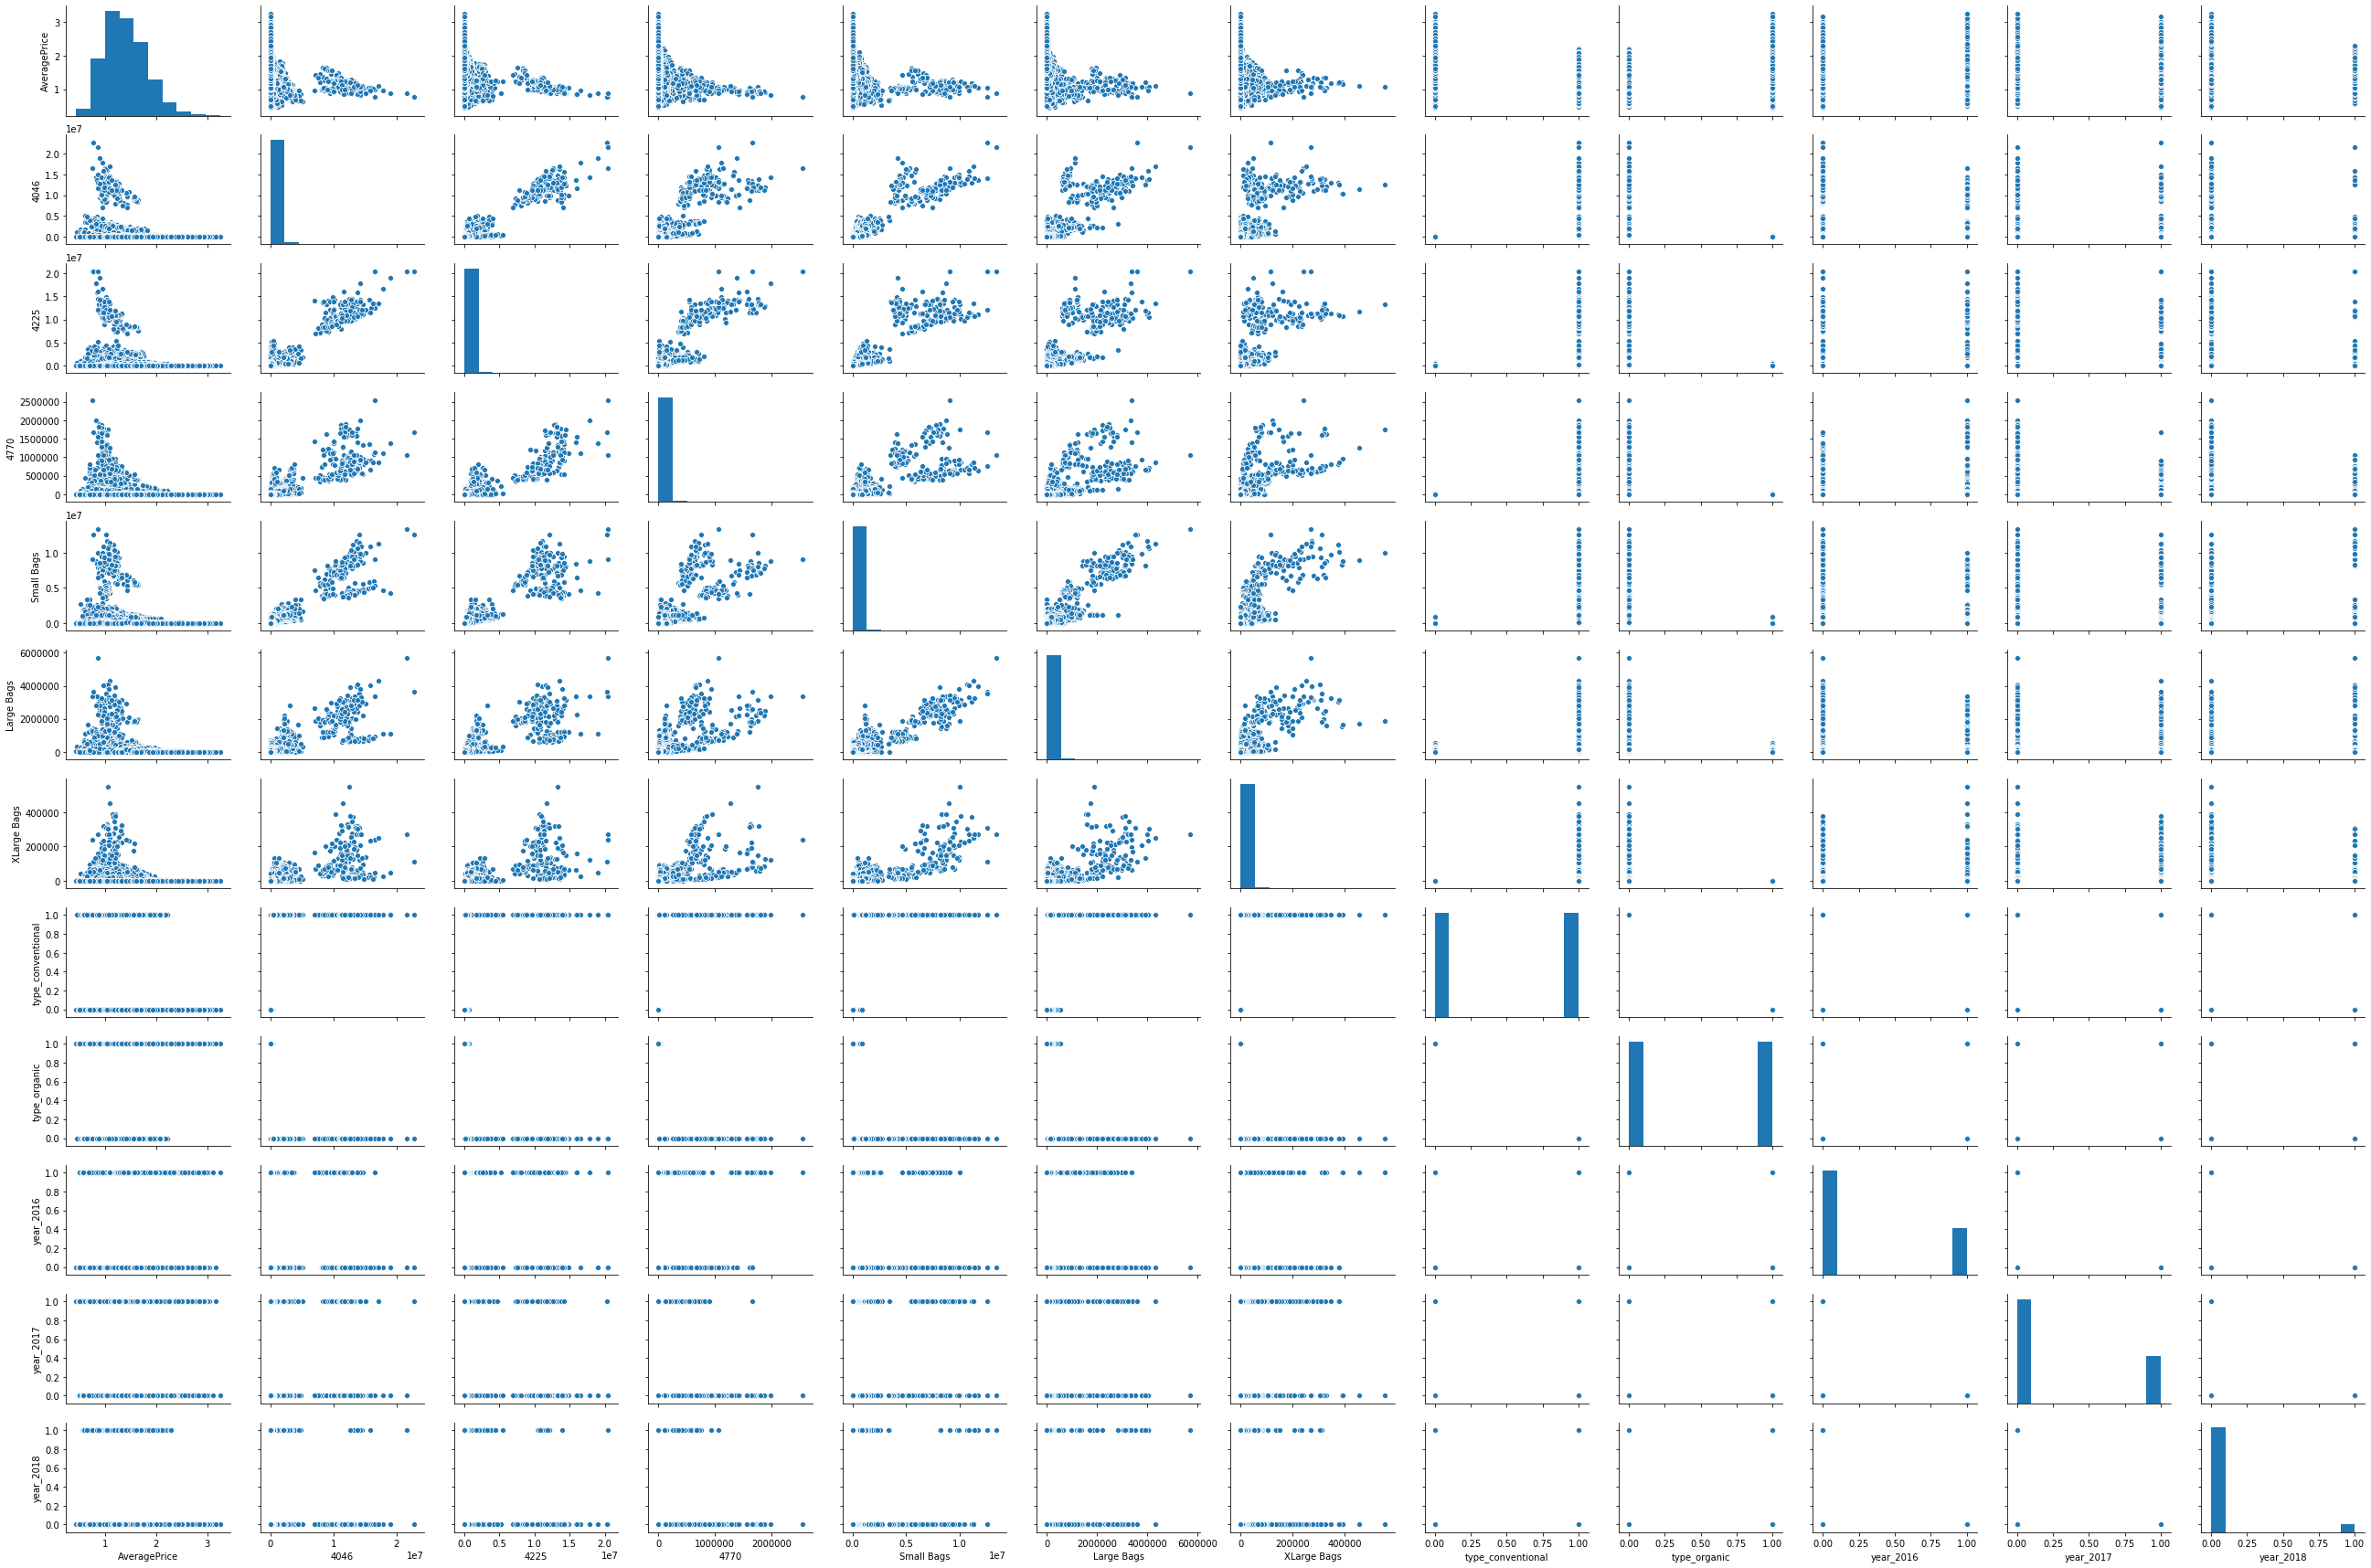

In [79]:
sns.pairplot(avocado_data4, size = 2, aspect = 1.5)

So, there seems no multicollinearity.

<a id=section603></a>

### 6.3 Preparing X and y using pandas

In [81]:
X = avocado_data4.loc[:,avocado_data4.columns != 'AveragePrice']
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic,year_2016,year_2017,year_2018
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,1,0,0,0,0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,1,0,0,0,0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,1,0,0,0,0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,1,0,0,0,0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,1,0,0,0,0


In [83]:
Y = y_logScale
Y.head()

0    0.285179
1    0.300105
2   -0.072571
3    0.076961
4    0.246860
Name: AveragePrice, dtype: float64

In [84]:
#scaling on X

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)                                                                        # fit the data to Standardscaler

Xs = sc.transform(X)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(Xs, columns=X.columns).head()) 

After standardizing our features, the first 5 rows of our data now look like this:

       4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0 -0.230816 -0.199902 -0.212091   -0.232647   -0.222352     -0.17558   
1 -0.231103 -0.208054 -0.211997   -0.231568   -0.222335     -0.17558   
2 -0.231007 -0.154478 -0.211325   -0.233399   -0.222311     -0.17558   
3 -0.230741 -0.185350 -0.211864   -0.236568   -0.222186     -0.17558   
4 -0.230891 -0.208719 -0.211834   -0.236154   -0.221924     -0.17558   

   type_conventional  type_organic  year_2016  year_2017  year_2018  
0           0.999836     -0.999836  -0.666746   -0.67585   -0.27649  
1           0.999836     -0.999836  -0.666746   -0.67585   -0.27649  
2           0.999836     -0.999836  -0.666746   -0.67585   -0.27649  
3           0.999836     -0.999836  -0.666746   -0.67585   -0.27649  
4           0.999836     -0.999836  -0.666746   -0.67585   -0.27649  


<a id=section604></a>

### 6.4 Splitting X and y into training and test datasets.

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.20, random_state=1)

In [86]:
print(X_train.shape)
print(y_train.shape)

(14599, 11)
(14599,)


<a id=section605></a>

### 6.5 Linear regression in scikit-learn

In [88]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 1.4050588396110046
Coefficients: [-0.12617332  0.12971275 -0.03724409  0.01890732 -0.03297496  0.02653021
 -0.12203207  0.12203207 -0.01631098  0.06355046 -0.00605637]


<a id=section606></a>

### 6.6 Using the Model for Prediction

In [91]:
y_pred_train = linreg.predict(X_train)  

In [92]:
y_pred_test = linreg.predict(X_test)                                                           # make predictions on the testing set

<a id = section607></a>

### 6.7 Model evaluation 

Computing the RMSE for our Average Price prediction.

In [94]:
from sklearn import metrics

In [95]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [96]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.3039164285599617
RMSE for test set is 0.30118465366375685


Computing the adjusted r-squared for our Average Price prediction.

In [97]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.4300837333568138 0.4296539617154156


In [98]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.4415101607888626 0.43982148892758655


Adjusted r-squared values is more than RMSE.

<a id = section7></a>

## 7. Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 0)

model.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

<a id=section701></a>

### 7.1 Using the Model for Prediction

In [107]:
y_pred_train1 = model.predict(X_train)  

In [108]:
y_pred_test1 = model.predict(X_test)                                                           # make predictions on the testing set

<a id = section702></a>

### 7.2 Model evaluation 

Computing the RMSE for our Average Price prediction.

In [94]:
from sklearn import metrics

In [109]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train1))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test1))

In [110]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.07942157145725964
RMSE for test set is 0.1778597330975571


<a id = section8></a>

## 8. Conclusion

RMSE is very less than Linear Regression. So, we use Random Forest Classifier for prediction.